# Importation des bibliothèques 


In [ ]:
pip install -r requirements.txt 

# Extraction des données 

In [1]:
from src.load_dataset import load_signals, split_signals
import numpy as np

csv_path = "data/ptbxl/ptbxl_database.csv"
records_path = "data/ptbxl"

signals, df = load_signals(csv_path, records_path)
X_train, X_val, X_test = split_signals(signals, df)

# Sauvegarde
np.save("data/processed/X_train.npy", X_train)
np.save("data/processed/X_val.npy", X_val)
np.save("data/processed/X_test.npy", X_test)


📂 Étape 1 : Chargement des métadonnées...
→ Total ECG dans CSV : 21799
→ ECG conservés (folds (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)) : 21799
🔄 Étape 2 : Chargement des signaux à 500 Hz avec WFDB...
→ 0 signaux chargés...
→ 100 signaux chargés...
→ 200 signaux chargés...
→ 300 signaux chargés...
→ 400 signaux chargés...
→ 500 signaux chargés...
→ 600 signaux chargés...
→ 700 signaux chargés...
→ 800 signaux chargés...
→ 900 signaux chargés...
→ 1000 signaux chargés...
→ 1100 signaux chargés...
→ 1200 signaux chargés...
→ 1300 signaux chargés...
→ 1400 signaux chargés...
→ 1500 signaux chargés...
→ 1600 signaux chargés...
→ 1700 signaux chargés...
→ 1800 signaux chargés...
→ 1900 signaux chargés...
→ 2000 signaux chargés...
→ 2100 signaux chargés...
→ 2200 signaux chargés...
→ 2300 signaux chargés...
→ 2400 signaux chargés...
→ 2500 signaux chargés...
→ 2600 signaux chargés...
→ 2700 signaux chargés...
→ 2800 signaux chargés...
→ 2900 signaux chargés...
→ 3000 signaux chargés...
→ 3100 signaux

# Visualisation des 5 premiers signaux du set d'entraînement 

Forme de X_train : (17418, 5000, 12)
Forme de X_val : (2183, 5000, 12)
Forme de X_test : (2198, 5000, 12)


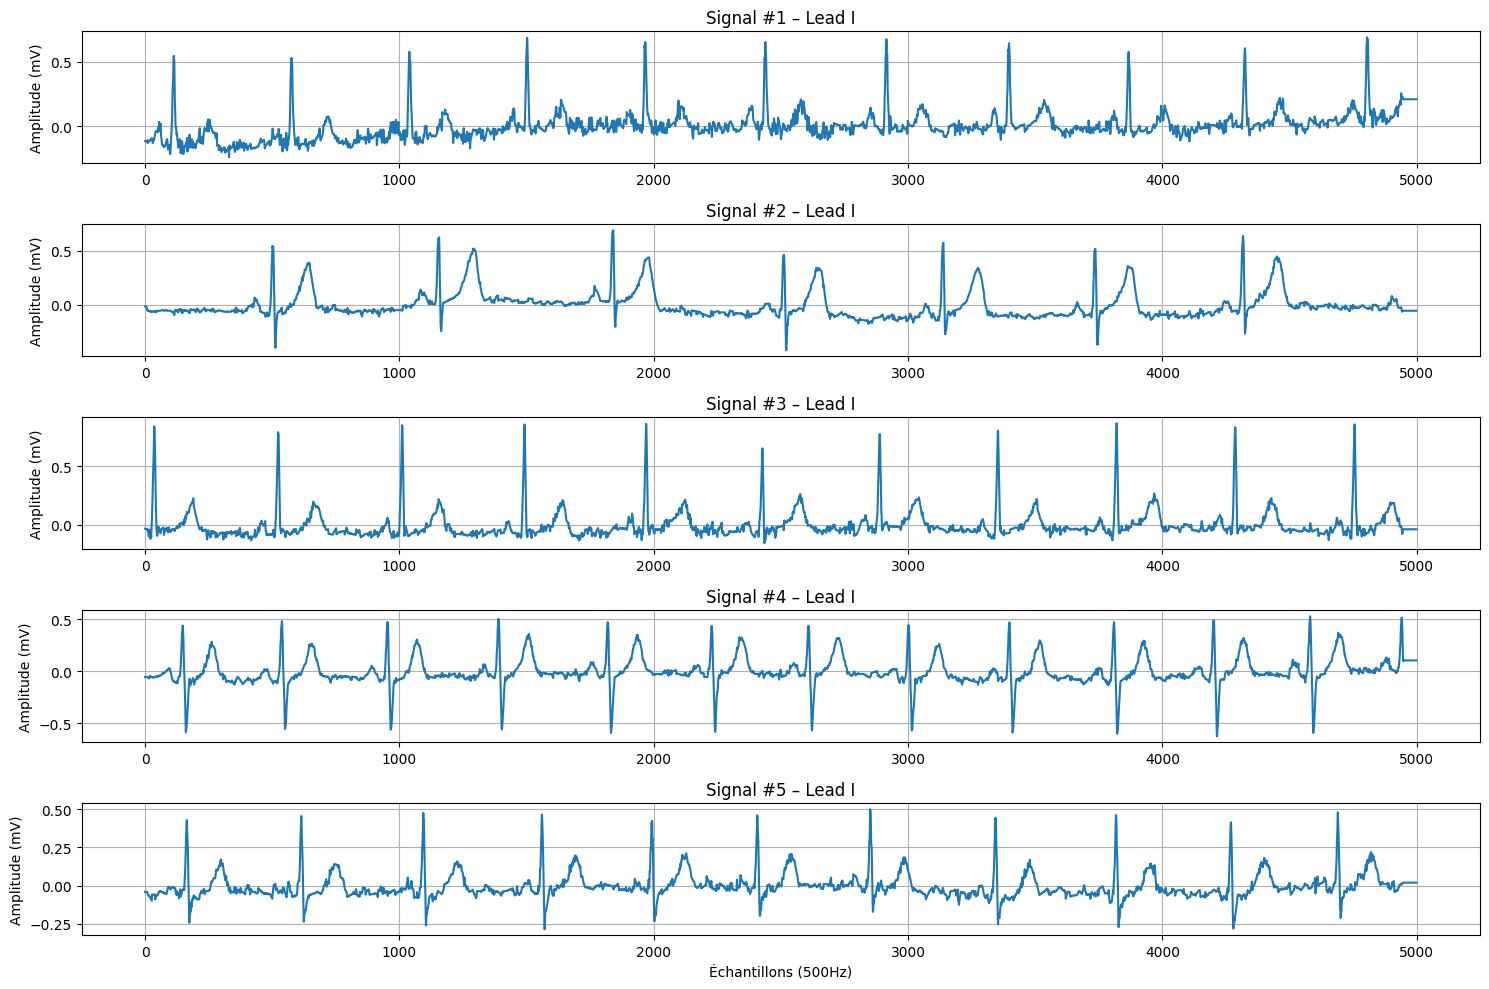

In [2]:
import matplotlib.pyplot as plt

# 🔍 Vérifie la forme
print(f"Forme de X_train : {X_train.shape}")  # ex: (800, 5000, 12)
print(f"Forme de X_val : {X_val.shape}")  # ex: (800, 5000, 12)
print(f"Forme de X_test : {X_test.shape}")  # ex: (800, 5000, 12)

# 📈 Affiche les 5 premiers signaux (Lead I)
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.plot(X_train[i][:, 0])  # Lead I
    plt.title(f"Signal #{i+1} – Lead I")
    plt.ylabel("Amplitude (mV)")
    plt.grid(True)

plt.xlabel("Échantillons (500Hz)")
plt.tight_layout()
plt.show()



# Génération des différents bruits dans les signaux propres 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.generate_noisy_data import generate_noisy_data

#génération des signaux bruités 
generate_noisy_data()

génération des signaux bruités
📦 Génération des versions bruitées...

📥 Traitement du set : TRAIN
→ Total signaux : 17418
→ Répartition : 4354 par bruit, reste : 2
🔊 1. Bruit gaussien...
   → 0/4354
   → 50/4354
   → 100/4354
   → 150/4354
   → 200/4354
   → 250/4354
   → 300/4354
   → 350/4354
   → 400/4354
   → 450/4354
   → 500/4354
   → 550/4354
   → 600/4354
   → 650/4354
   → 700/4354
   → 750/4354
   → 800/4354
   → 850/4354
   → 900/4354
   → 950/4354
   → 1000/4354
   → 1050/4354
   → 1100/4354
   → 1150/4354
   → 1200/4354
   → 1250/4354
   → 1300/4354
   → 1350/4354
   → 1400/4354
   → 1450/4354
   → 1500/4354
   → 1550/4354
   → 1600/4354
   → 1650/4354
   → 1700/4354
   → 1750/4354
   → 1800/4354
   → 1850/4354
   → 1900/4354
   → 1950/4354
   → 2000/4354
   → 2050/4354
   → 2100/4354
   → 2150/4354
   → 2200/4354
   → 2250/4354
   → 2300/4354
   → 2350/4354
   → 2400/4354
   → 2450/4354
   → 2500/4354
   → 2550/4354
   → 2600/4354
   → 2650/4354
   → 2700/4354
   → 2750/4

# Visualisation des 4 premiers signaux bruités artificiellement 

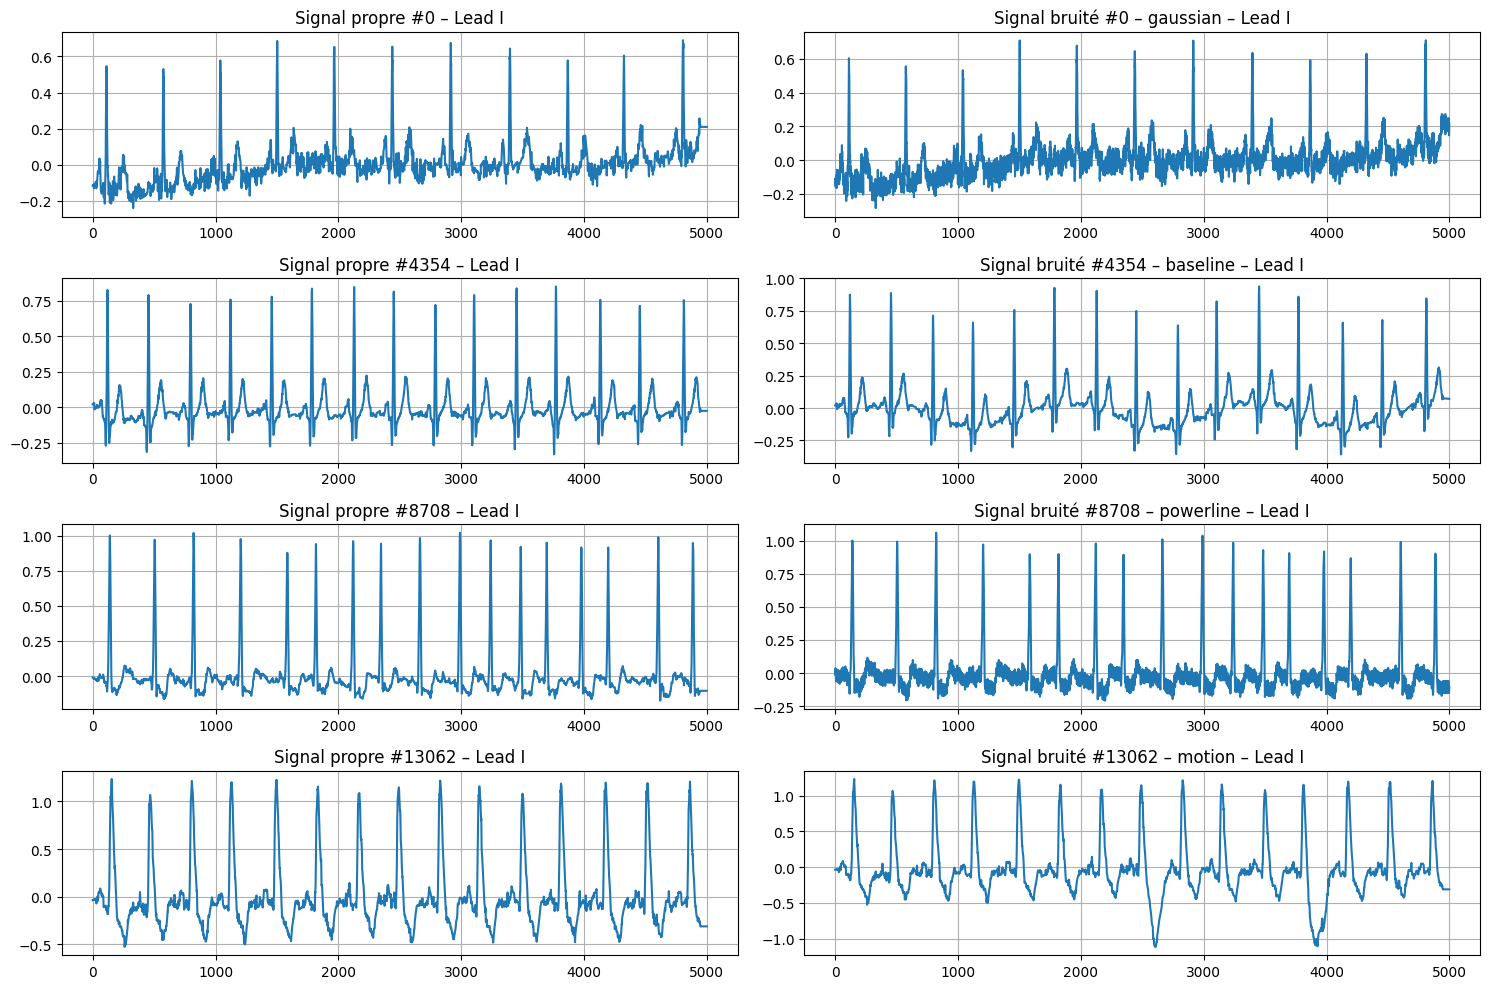

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Chargement des signaux
X_train = np.load("data/processed/X_train.npy")
X_train_noisy = np.load("data/noisy/X_train_noisy.npy")
labels = np.load("data/noisy/X_train_noisy_labels.npy")

# Types de bruit à afficher
types_bruit = ["gaussian", "baseline", "powerline", "motion"]

# Trouver les indices correspondant à chaque type de bruit
indices = [np.where(labels == bruit)[0][0] for bruit in types_bruit]

# Affichage
plt.figure(figsize=(15, 10))

for i, (bruit, idx) in enumerate(zip(types_bruit, indices)):
    plt.subplot(4, 2, 2*i + 1)
    plt.plot(X_train[idx][:, 0])
    plt.title(f"Signal propre #{idx} – Lead I")
    plt.grid(True)

    plt.subplot(4, 2, 2*i + 2)
    plt.plot(X_train_noisy[idx][:, 0])
    plt.title(f"Signal bruité #{idx} – {bruit} – Lead I")
    plt.grid(True)

plt.tight_layout()
plt.show()


## Entraînement du modèle : Autoencodeur de débruitage ECG

Nous entraînons un autoencodeur convolutionnel 1D conçu pour supprimer les bruits artificiels injectés dans les signaux ECG.

- **Entrée** : signal ECG bruité (12 leads, 5000 points, bruit unique)
- **Sortie** : signal ECG propre attendu
- **Perte utilisée** : MSE (Mean Squared Error)
- **Optimiseur** : Adam
- **Données** :
  - 80 % pour l'entraînement
  - 10 % pour la validation (suivi de la perte)
  - Les données bruitées sont réparties équitablement entre 4 types de bruit (gaussien, baseline wander, bruit secteur, mouvement d’électrode)


In [1]:
from src.train_autoencoder import train_autoencoder

train_autoencoder(
    batch_size=32,
    epochs=20,
    lr=1e-3,
    model_save_path="models/autoencoder.pth"
)

📟 Entraînement sur : cpu
🚀 Démarrage de l'entraînement...
📚 Époch 1/20 | Loss train : 0.012026 | val : 0.006169
📚 Époch 2/20 | Loss train : 0.004717 | val : 0.001559
📚 Époch 3/20 | Loss train : 0.003373 | val : 0.001161
📚 Époch 4/20 | Loss train : 0.003729 | val : 0.003938
📚 Époch 5/20 | Loss train : 0.004421 | val : 0.001438
📚 Époch 6/20 | Loss train : 0.005239 | val : 0.001528
📚 Époch 7/20 | Loss train : 0.002411 | val : 0.001195
📚 Époch 8/20 | Loss train : 0.002534 | val : 0.001901
📚 Époch 9/20 | Loss train : 0.002137 | val : 0.000868
📚 Époch 10/20 | Loss train : 0.001692 | val : 0.002477
📚 Époch 11/20 | Loss train : 0.002221 | val : 0.010146
📚 Époch 12/20 | Loss train : 0.003338 | val : 0.001596
📚 Époch 13/20 | Loss train : 0.002319 | val : 0.001092
📚 Époch 14/20 | Loss train : 0.001830 | val : 0.002221
📚 Époch 15/20 | Loss train : 0.002365 | val : 0.000951
📚 Époch 16/20 | Loss train : 0.001857 | val : 0.000818
📚 Époch 17/20 | Loss train : 0.002423 | val : 0.001179
📚 Époch 18/20 | 

## Visualisation de la courbe de Loss

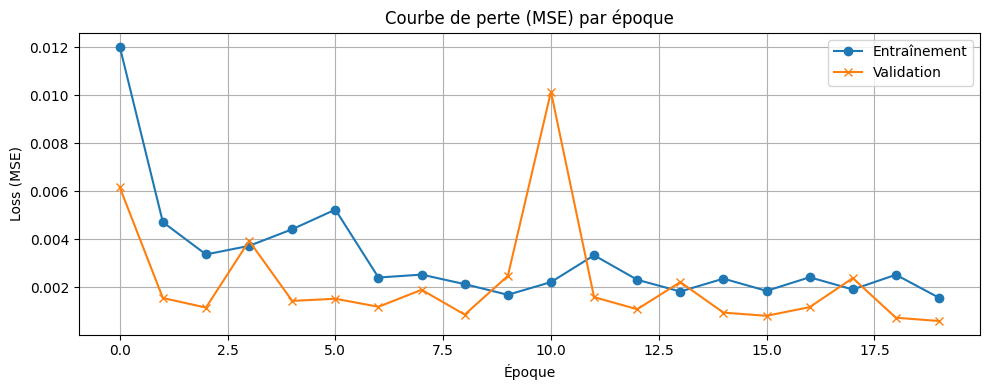

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 📥 Charger les courbes de perte
train_losses = np.load("results/train_losses.npy")
val_losses = np.load("results/val_losses.npy")

# 📈 Affichage
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Entraînement", marker='o')
plt.plot(val_losses, label="Validation", marker='x')
plt.title("Courbe de perte (MSE) par époque")
plt.xlabel("Époque")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Évaluation du modèle entraîné : Autoencodeur de débruitage ECG

In [2]:
from src.eval_autoencoder import evaluate_autoencoder

evaluate_autoencoder(
    model_path = "models/autoencoder.pth",
    path_noisy = "data/noisy/X_test_noisy.npy",
    path_clean = "data/processed/X_test.npy",
    path_labels = "data/noisy/X_test_noisy_labels.npy"
)


📟 Évaluation sur : cpu


h:\Downloads\ECG_Project-20250327T050302Z-001\ECG_Project\src\eval_autoencoder.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_pa

🔍 Prédiction des signaux...
📊 Calcul des métriques...

📈 Résultats globaux sur X_test :
   - MSE  : 0.001242
   - SNR  : 16.87 dB
   - Corr : 0.9838

📊 Résultats par type de bruit :
   [gaussian]  MSE: 0.001467 | SNR: 16.18 dB | Corr: 0.9805
   [baseline]  MSE: 0.001044 | SNR: 17.06 dB | Corr: 0.9852
   [powerline]  MSE: 0.001307 | SNR: 17.06 dB | Corr: 0.9848
   [motion]  MSE: 0.001152 | SNR: 17.18 dB | Corr: 0.9846


# Affichage Signaux par type de bruit 

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_16024\197149575.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"models/autoencod

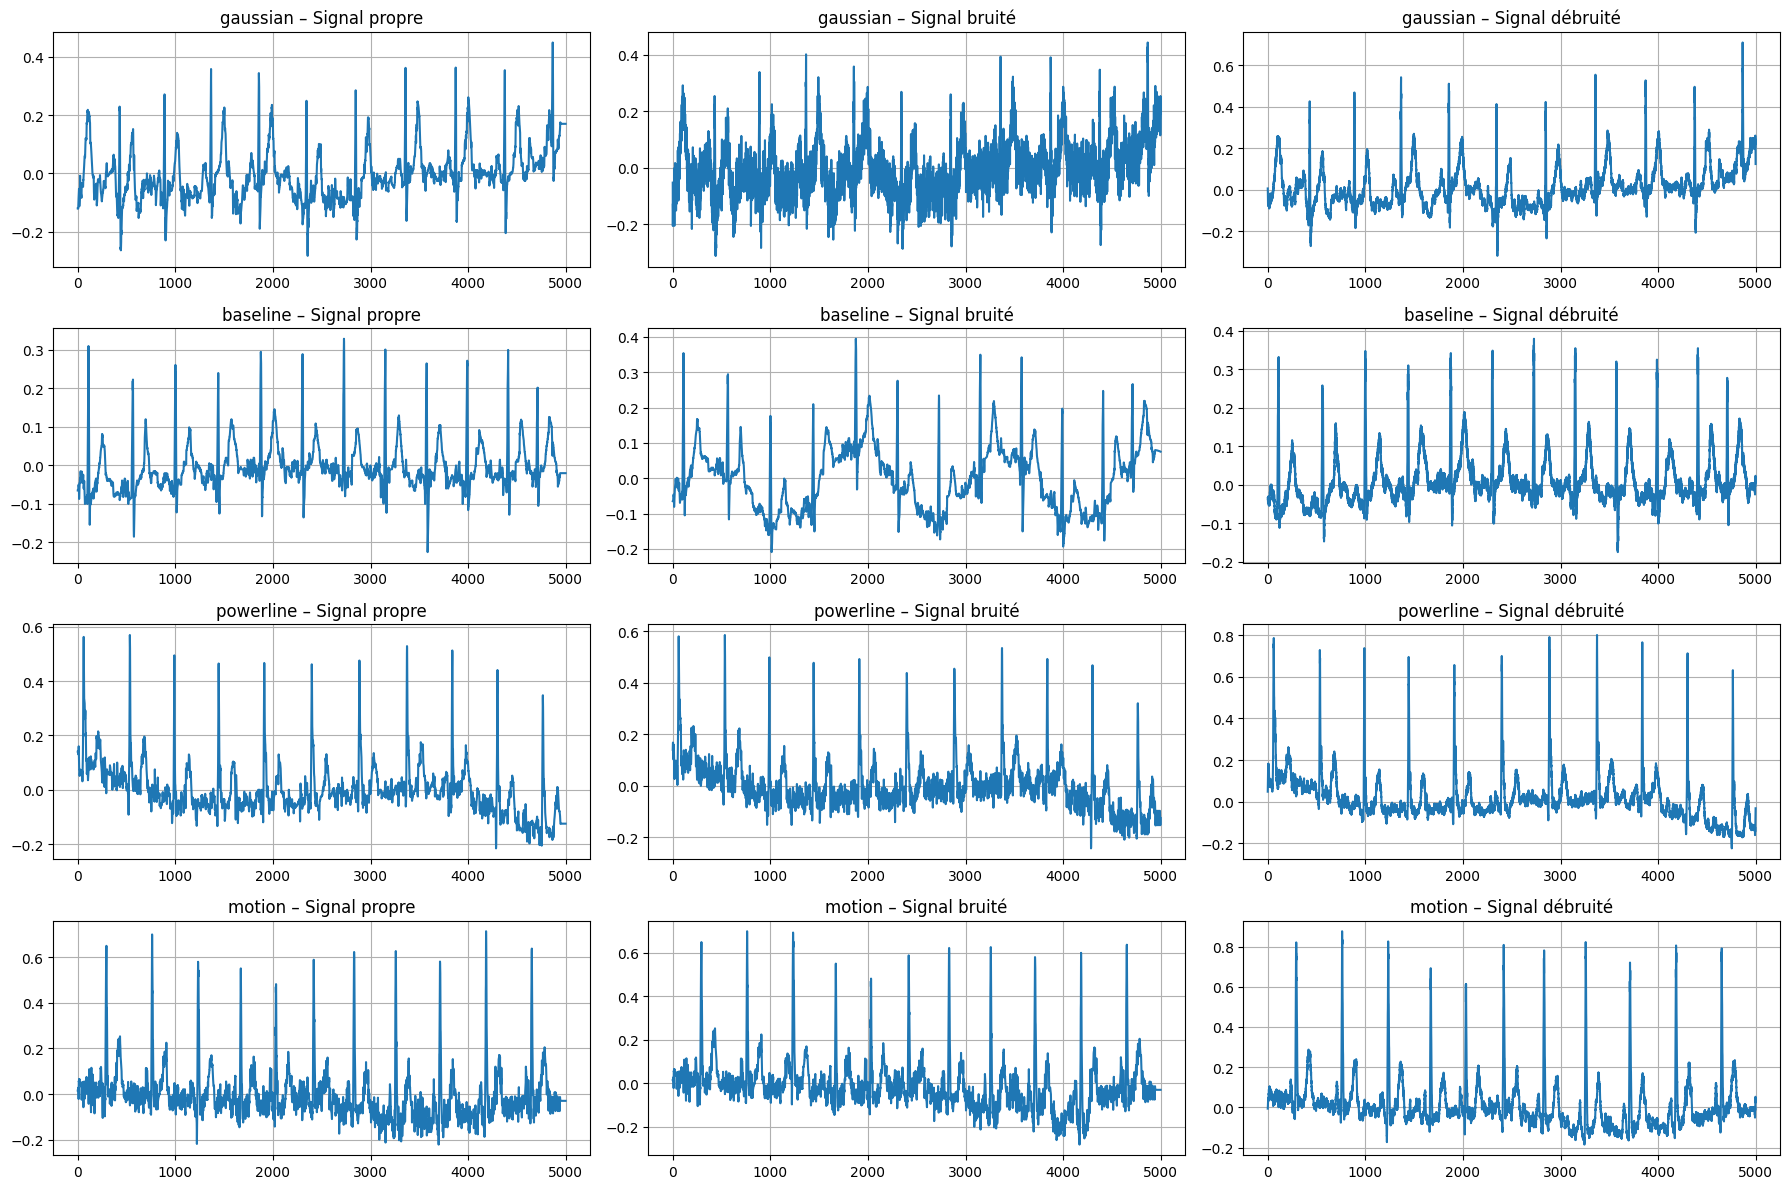

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from models.autoencoder import ECGDenoisingAutoencoder

# 📥 Charger les signaux
X_test = np.load("data/processed/X_test.npy")
X_test_noisy = np.load("data/noisy/X_test_noisy.npy")
labels = np.load("data/noisy/X_test_noisy_labels.npy")

# 📟 Charger le modèle
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ECGDenoisingAutoencoder().to(device)
model.load_state_dict(torch.load("models/autoencoder.pth", map_location=device))
model.eval()

# 📊 Affichage
types_bruit = ["gaussian", "baseline", "powerline", "motion"]

plt.figure(figsize=(18, 12))

for i, bruit in enumerate(types_bruit):
    idx = np.where(labels == bruit)[0][0]
    
    clean = X_test[idx][:, 0]      # lead I
    noisy = X_test_noisy[idx][:, 0]
    
    with torch.no_grad():
        input_tensor = torch.tensor(X_test_noisy[idx].T).unsqueeze(0).to(device)  # [1, 12, 5000]
        output_tensor = model(input_tensor).cpu().squeeze(0).T  # [5000, 12]
        denoised = output_tensor[:, 0].numpy()

    plt.subplot(4, 3, 3*i + 1)
    plt.plot(clean)
    plt.title(f"{bruit} – Signal propre")
    plt.grid(True)

    plt.subplot(4, 3, 3*i + 2)
    plt.plot(noisy)
    plt.title(f"{bruit} – Signal bruité")
    plt.grid(True)

    plt.subplot(4, 3, 3*i + 3)
    plt.plot(denoised)
    plt.title(f"{bruit} – Signal débruité")
    plt.grid(True)

plt.tight_layout()
plt.show()
